In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.cluster import KMeans
#import mpl_scatter_density # adds projection='scatter_density'
#from matplotlib.colors import LinearSegmentedColormap

In [2]:
def removealpha(data):#removes alpha of the data
    newdf2=[]
    for i in data:
        testlol=[]
        for j in i:
            test= j[0:3] # gets rgb (NO ALPHA)
            testlol.append(test)
        newdf2.append(testlol)
    return(newdf2)

In [3]:
imagered = Image.open("orange.png") # read image
datared=np.asarray(imagered)
datared[0][0]

array([209, 117, 110, 255], dtype=uint8)

In [4]:
def convert_to_center_bins(rgb): 
    num_bins = 25  
    bin_size = 255 // num_bins  
    center_bins = list((component // bin_size) * bin_size + bin_size // 2 for component in rgb) 
    return center_bins

rgb = (11, 151, 223)
center_rgb = convert_to_center_bins(rgb)
print(center_rgb)


[15, 155, 225]


In [5]:
listx =[]
for i in range(750):
    for j in range(750):
        listx.append(j+1)
len(listx)
listy=[]
for i in range(750):
    for j in range(750):
        listy.append(i+1)

In [6]:
newdf = removealpha(datared) #array without alpha
n_dims = np.array(newdf).shape[-1] #dimensions 3
ro, go, bo = np.array(newdf).reshape(-1, n_dims).T # gives r, g, b columns of the array
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy}) #make dataframes

In [7]:
df_rgb_og

,R,G,B,x,y
0,209,117,110,1,1
1,223,111,101,2,1
2,220,112,97,3,1
3,206,123,100,4,1
4,216,114,71,5,1
...,...,...,...,...,...
562495,213,118,65,746,750
562496,214,123,73,747,750
562497,216,121,67,748,750
562498,220,121,62,749,750


In [8]:
newdf=[]
for i in datared:
    testlol=[]
    for j in i:
        test= convert_to_center_bins(j[0:3])
        testlol.append(test)
    newdf.append(testlol)


n_dims = np.array(newdf).shape[-1]
r, g, b = np.array(newdf).reshape(-1, n_dims).T
df_rgb_full = pd.DataFrame({"R": r, "G": g, "B": b})


In [9]:
df_rgb = pd.DataFrame({"R": r, "G": g, "B": b,"x":listx,"y":listy}).sample(n=1000)
df_rgb

,R,G,B,x,y
365605,225,175,185,356,488
263717,75,65,75,468,352
406441,225,125,85,692,542
3231,225,125,85,232,5
147487,245,195,85,488,197
...,...,...,...,...,...
259352,25,25,5,603,346
304713,35,35,45,214,407
26023,225,125,85,524,35
308481,235,185,195,232,412


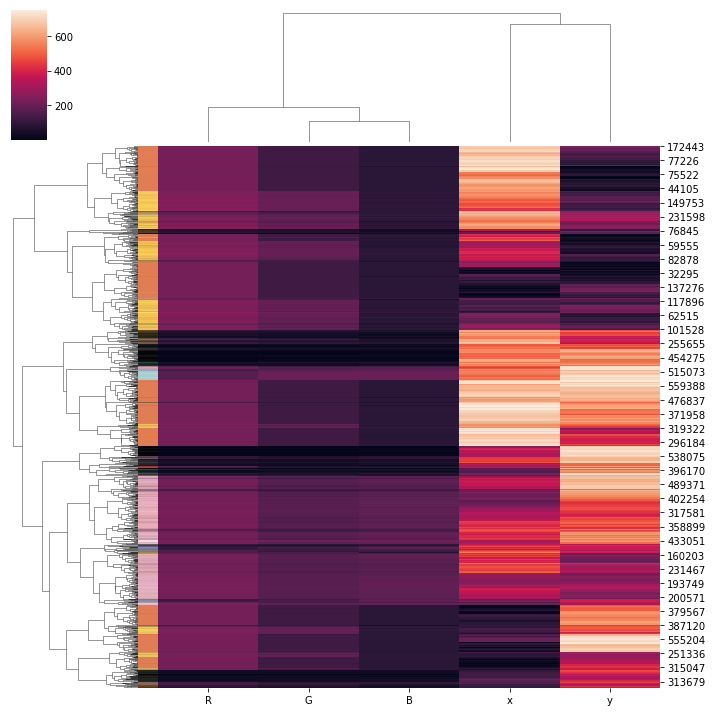

In [10]:
df_rgb = pd.DataFrame({"R": r, "G": g, "B": b,"x":listx,"y":listy}).sample(n=1000)
df_rgbtest= df_rgb.drop(columns=['x','y'], axis=1)
testt= df_rgbtest.to_numpy()
custom_colors = sns.color_palette(testt / 255.0)
sns.clustermap(df_rgb, annot=False, row_colors=custom_colors)#sample of 1000

Text(0.5, 0.98, 'Orange')

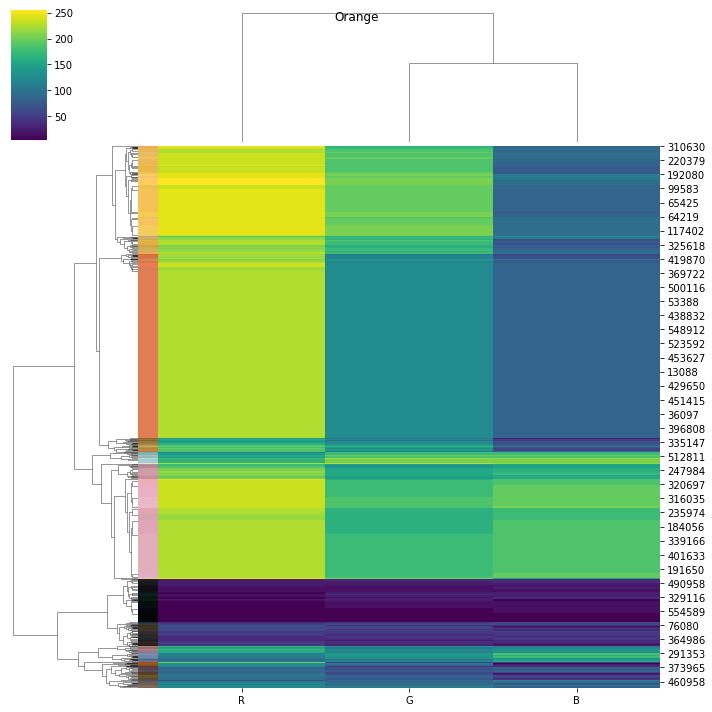

In [39]:
df_rgb2 = pd.DataFrame({"R": r, "G": g, "B": b,"x":listx,"y":listy}).sample(n=1000)
df_rgbtest= df_rgb2.drop(columns=['x','y'], axis=1)
testt= df_rgbtest.to_numpy()
custom_colors = sns.color_palette(testt / 255.0)
clust= sns.clustermap(df_rgbtest,  row_colors=custom_colors, cmap='viridis').fig.suptitle('Orange')#sample of 1000
clust

In [12]:
import scipy.cluster.hierarchy as sch
d = sch.distance.pdist(df_rgbtest)
L = sch.linkage(d, method='complete')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.2*d.max(), 'distance')

# clusters indicices correspond to incides of original df
turqindex=[]
for i,cluster in enumerate(clusters):
    if (cluster==14):
        #print(df_rgbtest.index[i], cluster)
        turqindex.append(df_rgbtest.index[i])
turqindex

[397402, 455553, 561222, 446547, 411259, 409094, 419491]

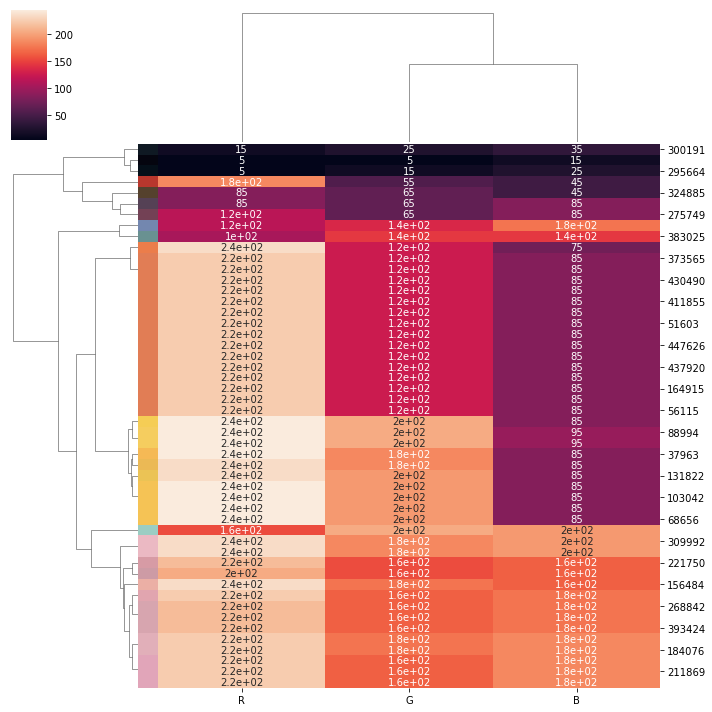

In [13]:
from matplotlib.colors import ListedColormap
df_rgb3 = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=50)#sample of 50
testt= df_rgb3.to_numpy()
custom_colors = sns.color_palette(testt / 255.0)
#labels = [format_label(rgb) for rgb in testt]
sns.clustermap(df_rgb3,annot=True,  row_colors=custom_colors)
#custom_cmap

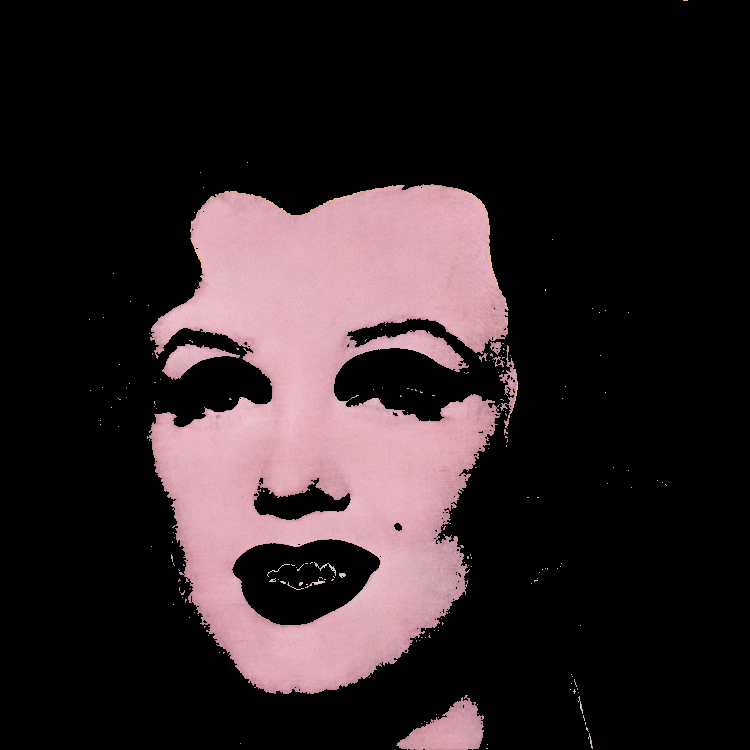

In [14]:
#220, 160, 180 ish is pink (skin)(bottom cluster)
#220, 220, 5 is yellow(hair) middle cluster
#120, 200,180 is turquoise(earring/eyeshadow) (middle bottom ish cluster)

df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo}) # orig values
df_rgb_copy=df_rgb_og
df_rgb_test = df_rgb_copy[df_rgb_copy['R'].between(180,255)] #select red
df_rgb_test =df_rgb_test[df_rgb_test['B'].between(130,210)] #select blue
df_rgb_test =df_rgb_test[df_rgb_test['G'].between(130,210)] #select green
df_rgb_test
face=df_rgb_test.index 
notface = ~df_rgb_copy.index.isin(face)
df_rgb_copy.loc[notface,'R']=0
df_rgb_copy.loc[notface,'G']=0
df_rgb_copy.loc[notface,'B']=0
width = 750
height = 750
reshaped_df = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(reshaped_df.astype(np.uint8))

In [15]:
test=df_rgb_copy.loc[face]

[(120.0, 230.0), (120.0, 230.0)]

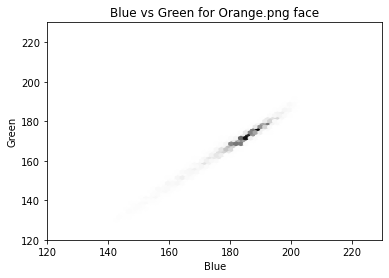

In [19]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test['B'], test['G'],gridsize=50, cmap='Greys')
ax0.set_title("Blue vs Green for Orange.png face")
plt.xlabel("Blue")
plt.ylabel("Green")
ax0.set(xlim=(120,230), ylim=(120,230))

[(150.0, 255.0), (120.0, 230.0)]

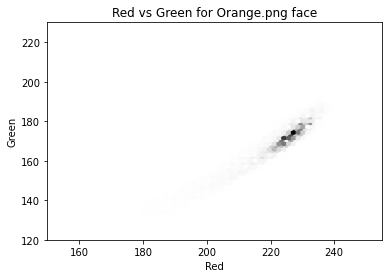

In [20]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test['R'], test['G'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Green for Orange.png face")
plt.xlabel("Red")
plt.ylabel("Green")
ax0.set(xlim=(150,255), ylim=(120,230))

[(150.0, 255.0), (120.0, 230.0)]

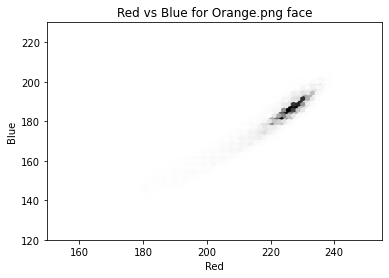

In [21]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test['R'], test['B'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Blue for Orange.png face")
plt.xlabel("Red")
plt.ylabel("Blue")
ax0.set(xlim=(150,255), ylim=(120,230))

In [31]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo})
df_rgb_copy=df_rgb_og
df_rgb_hair = df_rgb_copy[df_rgb_copy['R'].between(140,256)]
df_rgb_hair =df_rgb_hair[df_rgb_hair['B'].between(0,80)]
df_rgb_hair =df_rgb_hair[df_rgb_hair['G'].between(120,256)]
hair=df_rgb_hair.index 
nothair = ~df_rgb_copy.index.isin(hair)
df_rgb_copy.loc[nothair,'R']=0#160
df_rgb_copy.loc[nothair,'G']=0#32
df_rgb_copy.loc[nothair,'B']=0#240
width = 750
height = 750
hairdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')


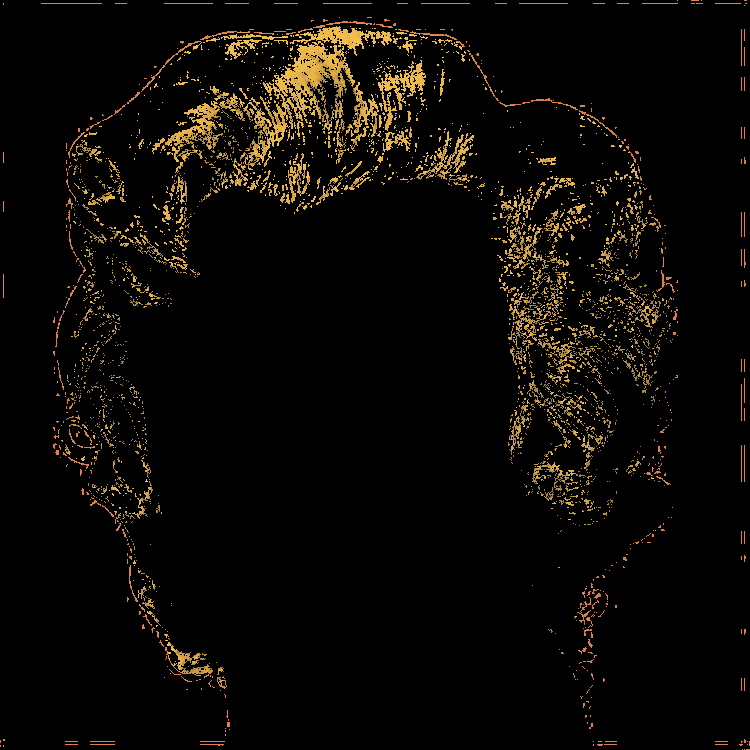

In [32]:
Image.fromarray(hairdf.astype(np.uint8))

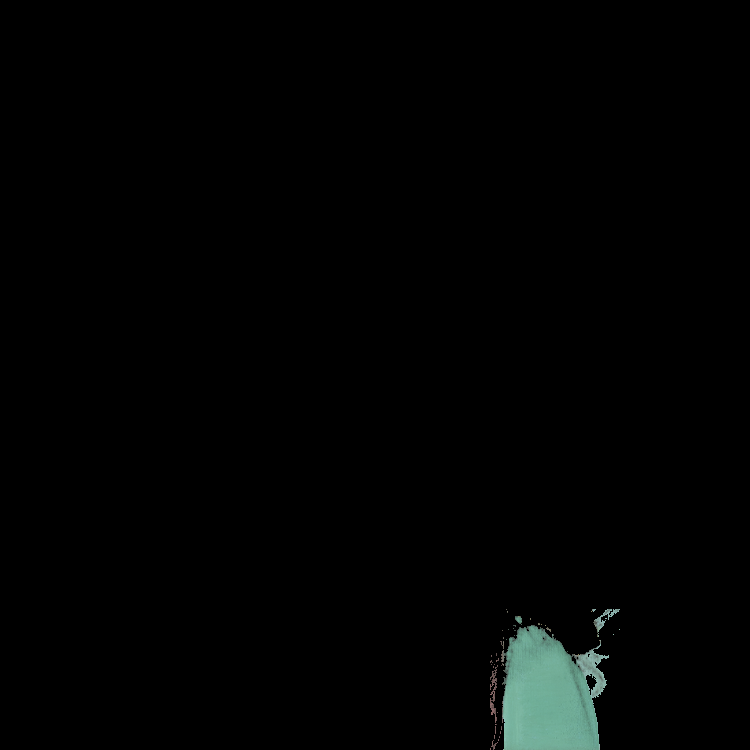

In [16]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(0,145)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(75,256)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(75,256)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(610,750)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['x'].between(491,750)]
turq=df_rgb_turq.index 
notturq = ~df_rgb_copy.index.isin(turq)
df_rgb_copy.loc[notturq,'R']=0#160
df_rgb_copy.loc[notturq,'G']=0#32
df_rgb_copy.loc[notturq,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
df_rgb_copy
turqdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(turqdf.astype(np.uint8))

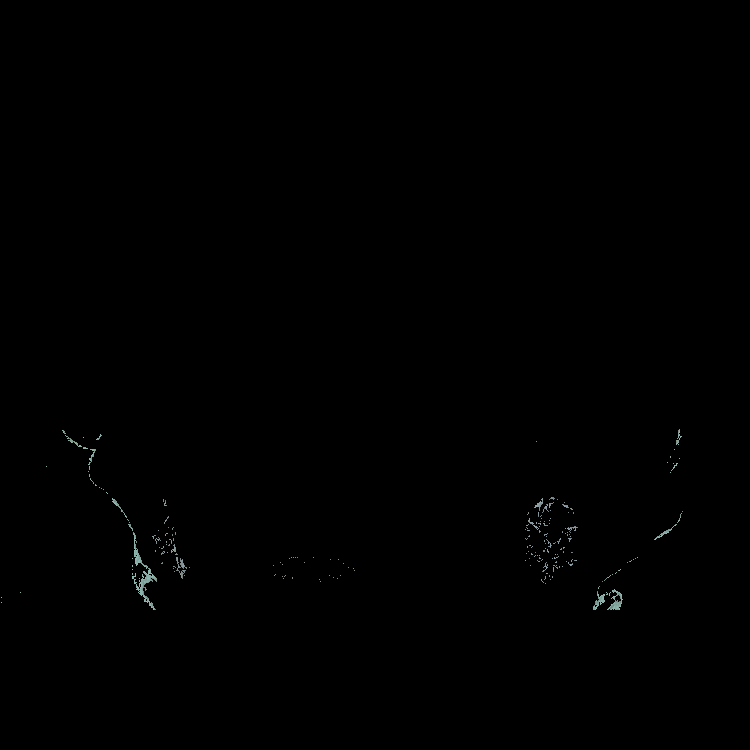

In [17]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(50,145)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(125,255)]#135
df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(0,255)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(430,610)]
turq=df_rgb_turq.index 
notturq = ~df_rgb_copy.index.isin(turq)
df_rgb_copy.loc[notturq,'R']=0#160
df_rgb_copy.loc[notturq,'G']=0#32
df_rgb_copy.loc[notturq,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
df_rgb_copy
turqdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(turqdf.astype(np.uint8))

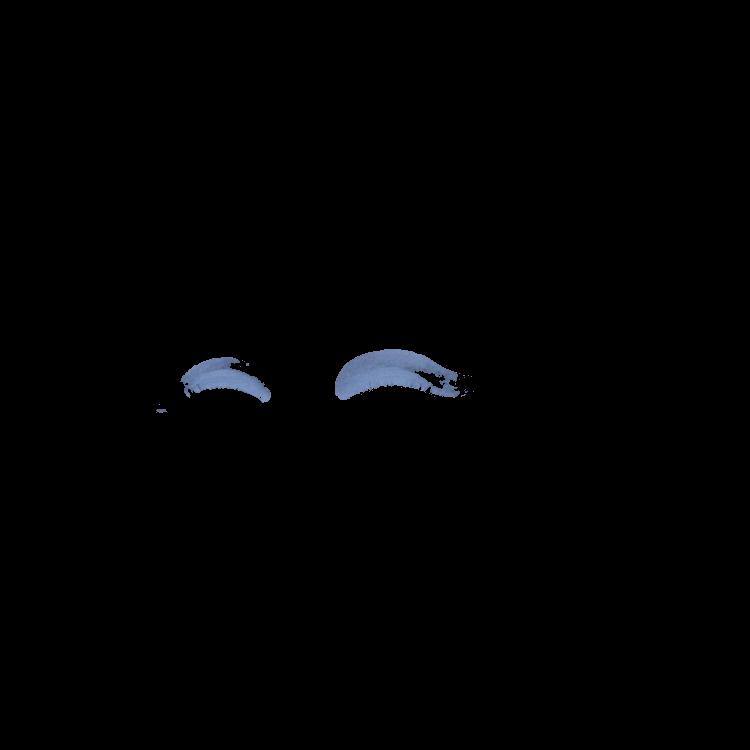

In [22]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(0,134)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(130,225)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(90,255)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['x'].between(100,500)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(200,430)]
turq=df_rgb_turq.index 
notturq = ~df_rgb_copy.index.isin(turq)
df_rgb_copy.loc[notturq,'R']=0#160
df_rgb_copy.loc[notturq,'G']=0#32
df_rgb_copy.loc[notturq,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
df_rgb_copy
turqdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(turqdf.astype(np.uint8))

In [24]:
test2=df_rgb_copy.loc[turq]

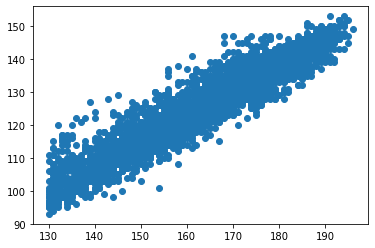

In [25]:
plt.scatter(test2['B'], test2['G'])

[(140.0, 255.0), (100.0, 250.0)]

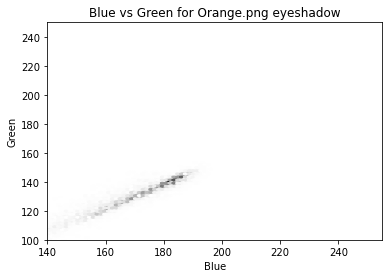

In [32]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test2['B'], test2['G'],gridsize=50, cmap='Greys')
ax0.set_title("Blue vs Green for Orange.png eyeshadow")
plt.xlabel("Blue")
plt.ylabel("Green")
ax0.set(xlim=(140,255), ylim=(100,250))

[(80.0, 240.0), (100.0, 255.0)]

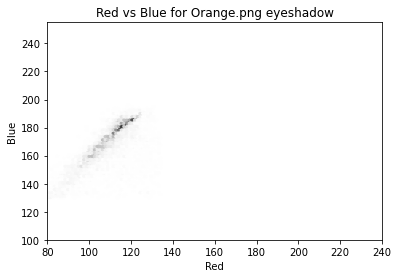

In [33]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test2['R'], test2['B'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Blue for Orange.png eyeshadow")
plt.xlabel("Red")
plt.ylabel("Blue")
ax0.set(xlim=(80,240), ylim=(100,255))

[(80.0, 250.0), (100.0, 250.0)]

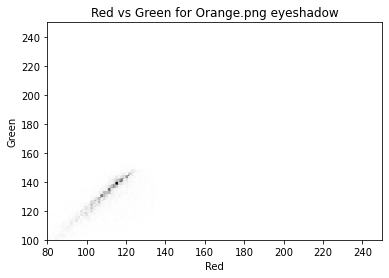

In [34]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test2['R'], test2['G'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Green for Orange.png eyeshadow")
plt.xlabel("Red")
plt.ylabel("Green")
ax0.set(xlim=(80,250), ylim=(100,250))

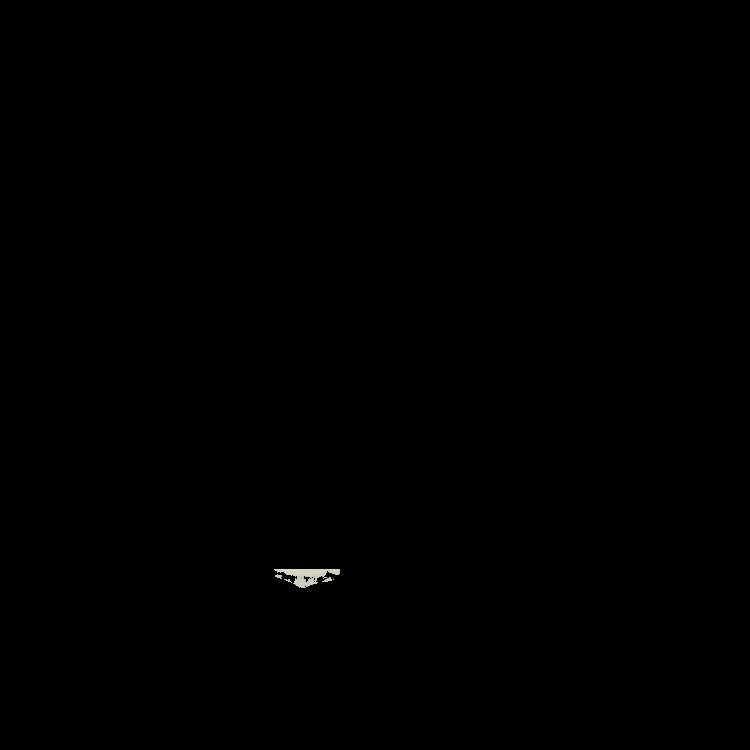

In [21]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_lips = df_rgb_copy[df_rgb_copy['R'].between(180,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['B'].between(180,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['G'].between(180,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['x'].between(240,340)]
df_rgb_lips= df_rgb_lips[df_rgb_lips['y'].between(570,600)]
lips=df_rgb_lips.index 
notlips = ~df_rgb_copy.index.isin(lips)
df_rgb_copy.loc[notlips,'R']=0#160
df_rgb_copy.loc[notlips,'G']=0#32
df_rgb_copy.loc[notlips,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
lipsdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(lipsdf.astype(np.uint8))

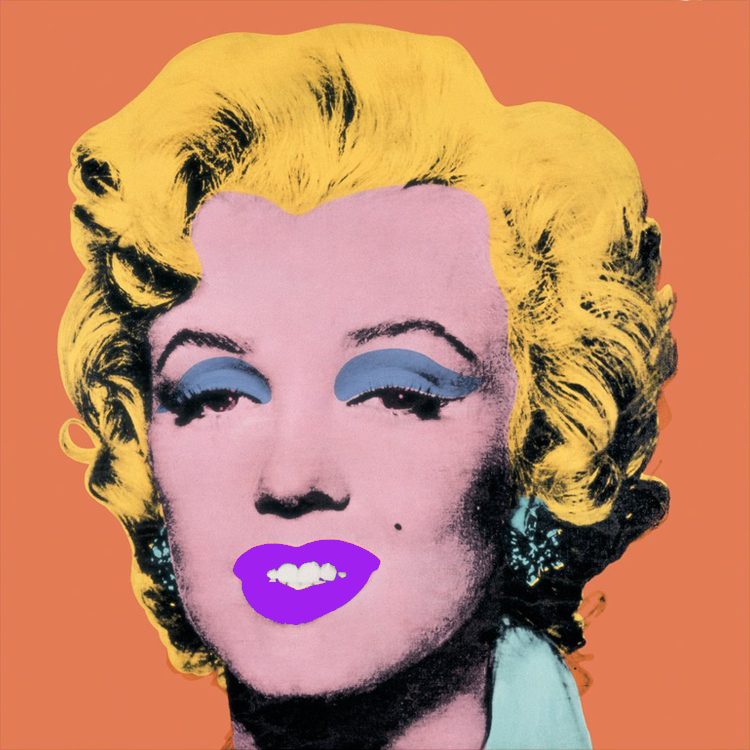

In [38]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_lips = df_rgb_copy[df_rgb_copy['R'].between(0,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['B'].between(0,120)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['G'].between(0,120)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['x'].between(220,400)]
df_rgb_lips= df_rgb_lips[df_rgb_lips['y'].between(540,640)]
lips=df_rgb_lips.index 
notlips = ~df_rgb_copy.index.isin(lips)
df_rgb_copy.loc[lips,'R']=160
df_rgb_copy.loc[lips,'G']=32
df_rgb_copy.loc[lips,'B']=240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
lipsdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(lipsdf.astype(np.uint8))

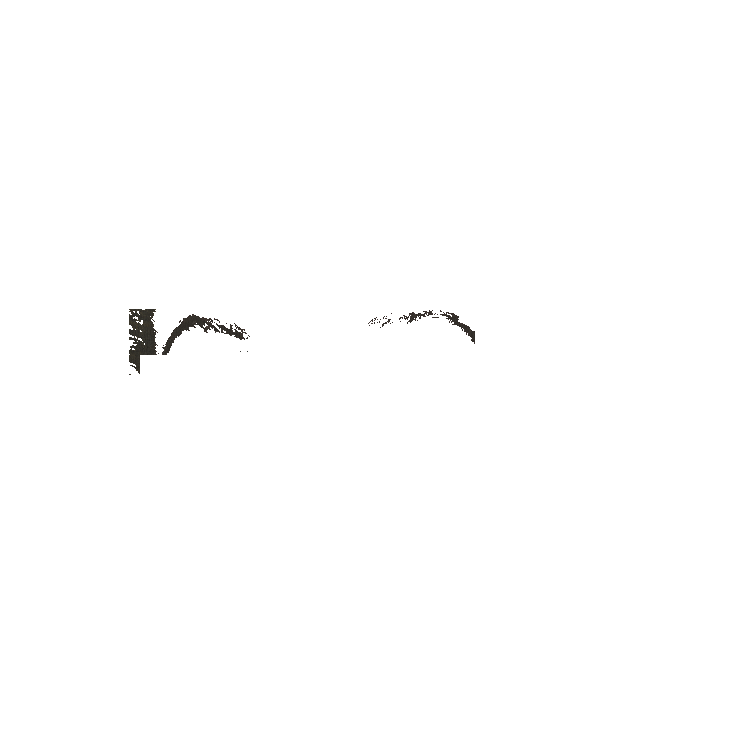

In [23]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_eyebrow = df_rgb_copy[df_rgb_copy['R'].between(0,70)]
df_rgb_eyebrow  =df_rgb_eyebrow [df_rgb_eyebrow ['B'].between(0,70)]
df_rgb_eyebrow  =df_rgb_eyebrow [df_rgb_eyebrow ['G'].between(0,70)]
df_rgb_eyebrow  =df_rgb_eyebrow [df_rgb_eyebrow ['x'].between(130,475)]
df_rgb_eyebrow = df_rgb_eyebrow [df_rgb_eyebrow ['y'].between(310,375)]
df_rgb_eyebrow2  = df_rgb_eyebrow[(df_rgb_eyebrow ['x']>140) & (df_rgb_eyebrow ['x']<500) 
                                 & (df_rgb_eyebrow ['y']>355) & (df_rgb_eyebrow ['y']<380)]
gg = pd.merge(df_rgb_eyebrow,df_rgb_eyebrow2, indicator=True, how='outer').set_axis(df_rgb_eyebrow.index).query('_merge=="left_only"').drop('_merge', axis=1)
eyebrow =gg.index 
noteyebrow  = ~df_rgb_copy.index.isin(eyebrow)
df_rgb_copy.loc[noteyebrow,'R']=255
df_rgb_copy.loc[noteyebrow,'G']=255
df_rgb_copy.loc[noteyebrow,'B']=255
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
lipsdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(lipsdf.astype(np.uint8))